In [23]:
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import tweepy
import json
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "qHc2KmYjQBY5bcCt9eJaFE1m6"
consumer_secret = "fHRvyOktOJaIw2dG5ZgAcbZg3x5BJ2CJ0kVd77gmB8evHbzQ2x"
access_token = "2523593044-fx8seMRbPJ2RYRlngVWwwq2X7Xny8DPCZhzXJOc"
access_token_secret = "S0VZboM2kH0WDXSF2jmVN819yKPUgoPbq7KtofvB97h4t"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [24]:
news_networks = ["@CNN","@FoxNews","@BBC","@NYT","@CBS"]

news = []
account =[]
date = []
text =[]
tweet_number=[]
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for network in news_networks:
    public_tweets = api.search(network, count=100, result_type="recent")
    for tweet in public_tweets['statuses']:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        news.append(network)
        account.append(tweet['user']['name'])
        date.append(tweet['created_at'])
        text.append(tweet['text'])
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

In [25]:
counter= 1
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user)
      # Loop through all tweets
    for tweet in public_tweets:

        # Utilize JSON dumps to generate a pretty-printed json
        # print(json.dumps(
        #     tweet, sort_keys=True, indent=4, separators=(',', ': ')))

        # Print Tweets
        print("Tip %s: %s" % (counter, tweet["text"]))

        # Add to Counter
        counter = counter + 1

Tip 1: happy_quotes
Tip 2: You look great @KDC5500 !
Tip 3: happy_quotes
Tip 4: You look great @KDC5500 !
Tip 5: happy_quotes
Tip 6: You look great @KDC5500 !
Tip 7: happy_quotes
Tip 8: You look great @KDC5500 !
Tip 9: happy_quotes
Tip 10: You look great @KDC5500 !


In [26]:
#create the data frame
df = pd.DataFrame({
    "Network":news,
    "User":account,
    "Date":date,
    "Text":text,
    "Positive":positive_list,
    "Neutral":neutral_list,
    "Negative":negative_list,
    "Compound":compound_list,
})
df = df[['Network','User','Date','Text','Positive','Neutral','Negative','Compound']]

In [27]:
df.to_csv("Twitter_Sentiments.csv")
df = df.sort_values("Date")
df

,Network,User,Date,Text,Positive,Neutral,Negative,Compound
435,@CBS,Fenny Liu,Thu Nov 02 00:00:01 +0000 2017,RT @dinoroc74: Not only does #MajorCrimes have...,0.238,0.762,0.000,0.7385
211,@BBC,HOW,Thu Nov 02 00:00:06 +0000 2017,"In a hyper-transparent world, youth is no mist...",0.000,0.556,0.444,-0.8555
434,@CBS,Shawn Klein,Thu Nov 02 00:00:10 +0000 2017,Pls look at this ChangeOrg petition to ask @CB...,0.277,0.653,0.069,0.6239
210,@BBC,R&AW PRIDE,Thu Nov 02 00:00:15 +0000 2017,@bbc British Doctors need education on crimina...,0.120,0.599,0.281,-0.6486
433,@CBS,Calum MacDonell,Thu Nov 02 00:00:32 +0000 2017,@CBS pulls @MeMyselfAndICBS - please don’t dro...,0.330,0.593,0.078,0.7783
209,@BBC,Tanuj Virani,Thu Nov 02 00:00:38 +0000 2017,RT @rcpsych: @BBC @BLennox4 @WesselyS That's i...,0.000,1.000,0.000,0.0000
432,@CBS,Jeremy C. F🦊x,Thu Nov 02 00:00:45 +0000 2017,@kenjimallon @CBS I mostly like the show but t...,0.216,0.639,0.145,0.2263
431,@CBS,leaner meaner Amina,Thu Nov 02 00:00:53 +0000 2017,RT @ZoeListerJones: #WCW @AngeliqueCabral @Hun...,0.000,1.000,0.000,0.0000
430,@CBS,夕凪,Thu Nov 02 00:00:56 +0000 2017,RT @whispernghope: Watching @NCIS_CBS thinking...,0.171,0.829,0.000,0.5093
208,@BBC,R&AW PRIDE,Thu Nov 02 00:00:58 +0000 2017,@bbc British Doctors need education on crimina...,0.120,0.599,0.281,-0.6486


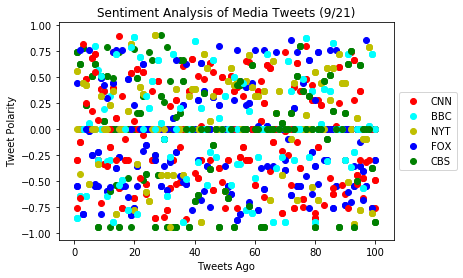

In [28]:
counter1=0
counter2=0
counter3=0
counter4=0
counter5=0

for index, row in df.iterrows():
    if (row["Network"]=="@CNN"):
        counter1 = counter1+1
        CNN = plt.scatter(counter1,row["Compound"],c ='r',marker="o")
    if (row["Network"]=="@NYT"):
        counter2 = counter2+1
        NYT = plt.scatter(counter2,row["Compound"],c ='y',marker="o")
    if (row["Network"]=="@FoxNews"):
        counter3 = counter3+1
        FOX = plt.scatter(counter3,row["Compound"],c ='b',marker="o")
    if (row["Network"]=="@BBC"):
        counter4 = counter4+1
        BBC = plt.scatter(counter4,row["Compound"],c ='cyan',marker="o")
    if (row["Network"]=="@CBS"):
        counter5 = counter5+1
        CBS = plt.scatter(counter5,row["Compound"],c ='g',marker="o")
        
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (9/21)")
plt.legend(handles = [CNN,BBC,NYT,FOX,CBS], labels = ["CNN","BBC","NYT","FOX","CBS"], loc='center left', bbox_to_anchor=(1, 0.5))

sns.set
plt.show()

In [29]:
new_df = pd.DataFrame(df.groupby("Network")["Compound"].mean())
new_df

,Compound
Network,
@BBC,-0.015878
@CBS,0.014019
@CNN,-0.054309
@FoxNews,-0.026633
@NYT,0.035431


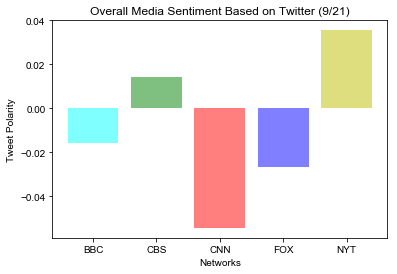

In [30]:
x_axis = np.arange(len(new_df["Compound"]))
compound_score = new_df["Compound"]
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])
plt.bar(x_axis, compound_score, color = ['cyan','g','r','b','y'], alpha=0.5, align="edge")
plt.xlabel("Networks")
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based on Twitter (9/21)")
sns.set()
plt.show()